In [32]:
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imghdr

class UnsharpFilter:
    def __init__(self,file):
        # load a gif image
        if imghdr.what(file) == 'gif':
            gif = cv2.VideoCapture(file)
            ret, self.originalImage = gif.read()
        else:
            self.originalImage = cv2.imread(file)
        
    def UnsharpFiltering_by_OpenCV(self,weight):
        self.src_gray = cv2.cvtColor(self.originalImage,cv2.COLOR_BGR2GRAY)        
        self.fsmoothed_cv = cv2.GaussianBlur(self.src_gray,(3,3),0)
        self.g_cv  = self.src_gray.astype(np.float32)-self.fsmoothed_cv.astype(np.float32)
        self.fsharpend_cv = self.src_gray.astype(np.float32) + weight*self.g_cv.astype(np.float32)

        
    def replicate_boundary(self,r_curr, c_curr,row,col):
        r_temp = r_curr
        c_temp = c_curr                       
        if r_temp<0:
            r_temp +=1
        elif r_temp>=row:
            r_temp -=1

        if c_temp<0:
            c_temp +=1
        elif c_temp>=col:
            c_temp -=1
        return r_temp, c_temp
            
    def get_GaussianBlurred(self,gkernel):
        row, col = self.src_gray.shape
        G = np.zeros((row,col))
        
        for r in range(row):
            for c in range(col):
                for i in range(3):
                    for j in range(3):
                        r_temp, c_temp = self.replicate_boundary(r+i-1,c+j-1,row,col)
                        G[r,c] += self.src_gray[r_temp,c_temp]*gkernel[i,j]

        return G 
        
    def UnsharpeFiltering_from_Scratches(self, weight):
        xdir_gauss = cv2.getGaussianKernel(3, 1.)
        gkernel1 = np.multiply(xdir_gauss.T, xdir_gauss)
                
        self.fsmoothed_scratch = self.get_GaussianBlurred(gkernel1)
        self.g_scratch = self.src_gray.astype(np.float32)-self.fsmoothed_scratch
        
        self.fsharpened_scratch = self.src_gray.astype(np.float32) + weight*self.g_scratch
        

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

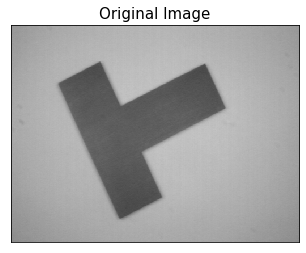

In [33]:
path = os.getcwd()
file = ''.join(path+"/wdg1.gif")
UF = UnsharpFilter(file)
plt.imshow(UF.originalImage)
plt.title('Original Image',fontsize=15)
plt.xticks([]), plt.yticks([])

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

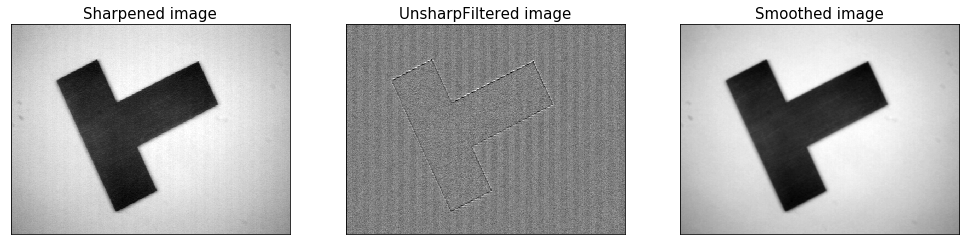

In [34]:
UF.UnsharpFiltering_by_OpenCV(0.3)

plt.figure(figsize=(17,6))
plt.subplot(131),plt.imshow(UF.fsharpend_cv, cmap='gray'),plt.title('Sharpened image',fontsize=15)
plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(UF.g_cv,cmap='gray'),plt.title('UnsharpFiltered image',fontsize=15)
plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(UF.fsmoothed_cv,cmap='gray'),plt.title('Smoothed image',fontsize=15)
plt.xticks([]), plt.yticks([])


(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

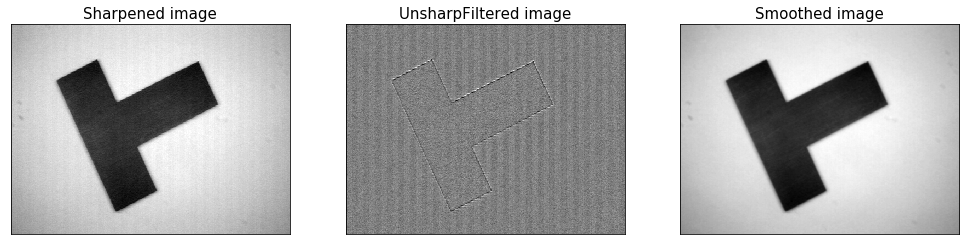

In [35]:
UF.UnsharpFiltering_by_OpenCV(0.7)

plt.figure(figsize=(17,6))
plt.subplot(131),plt.imshow(UF.fsharpend_cv, cmap='gray'),plt.title('Sharpened image',fontsize=15)
plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(UF.g_cv,cmap='gray'),plt.title('UnsharpFiltered image',fontsize=15)
plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(UF.fsmoothed_cv,cmap='gray'),plt.title('Smoothed image',fontsize=15)
plt.xticks([]), plt.yticks([])


(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

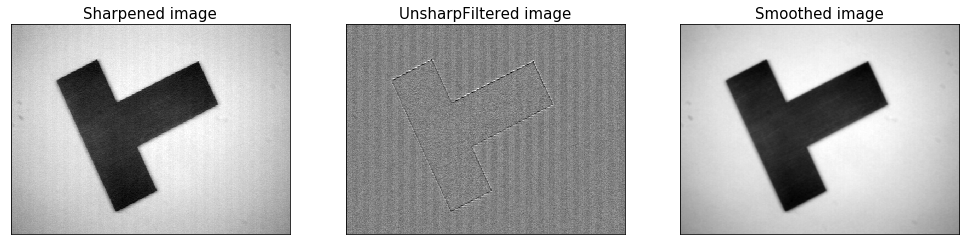

In [36]:
UF.UnsharpeFiltering_from_Scratches(0.7)
plt.figure(figsize=(17,6))
plt.subplot(131),plt.imshow(UF.fsharpened_scratch, cmap='gray'),plt.title('Sharpened image',fontsize=15)
plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(UF.g_scratch,cmap='gray'),plt.title('UnsharpFiltered image',fontsize=15)
plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(UF.fsmoothed_scratch,cmap='gray'),plt.title('Smoothed image',fontsize=15)
plt.xticks([]), plt.yticks([])
